# Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# reading data & analysis

In [3]:
df = pd.read_csv('./sex.csv')
df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [4]:
df.shape

(5001, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.describe()

long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000000                   0.000000  
50%       1.000000     0.000000                   0.000000  
75%       1.000000     1.000000                   1.000000  
max       1.000000     1.000000                   1.000000

In [7]:
X = df.drop('gender',axis=1)
y = df['gender']
y = (y=='Male').astype(int)

In [8]:
X.corr()

long_hair  forehead_width_cm  forehead_height_cm  \
long_hair                   1.000000          -0.006530           -0.017233   
forehead_width_cm          -0.006530           1.000000            0.088596   
forehead_height_cm         -0.017233           0.088596            1.000000   
nose_wide                   0.001216           0.251648            0.211655   
nose_long                   0.014432           0.257368            0.194120   
lips_thin                   0.011287           0.258564            0.205441   
distance_nose_to_lip_long  -0.025794           0.251328            0.215292   

                           nose_wide  nose_long  lips_thin  \
long_hair                   0.001216   0.014432   0.011287   
forehead_width_cm           0.251648   0.257368   0.258564   
forehead_height_cm          0.211655   0.194120   0.205441   
nose_wide                   1.000000   0.565192   0.557615   
nose_long                   0.565192   1.000000   0.561229   
lips_thin                   0.557615   0.561229   1.000000   
distance_nose_to_lip_long   0.569303   0.559794   0.565312   

                           distance_nose_to_lip_long  
long_hair                                  -0.025794  
forehead_width_cm                           0.251328  
forehead_height_cm                          0.215292  
nose_wide                                   0.569303  
nose_long                                   0.559794  
lips_thin                                   0.565312  
distance_nose_to_lip_long                   1.000000

# correlation b/w every feature with other

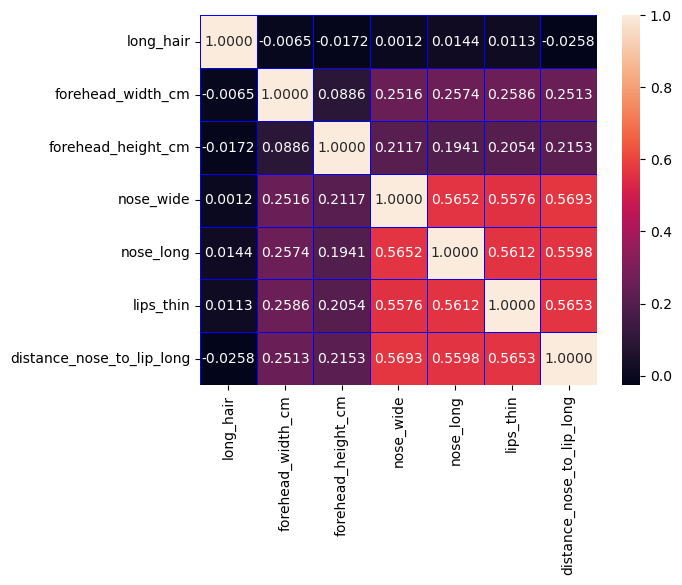

In [9]:
sns.heatmap(X.corr(),annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f")
plt.show()

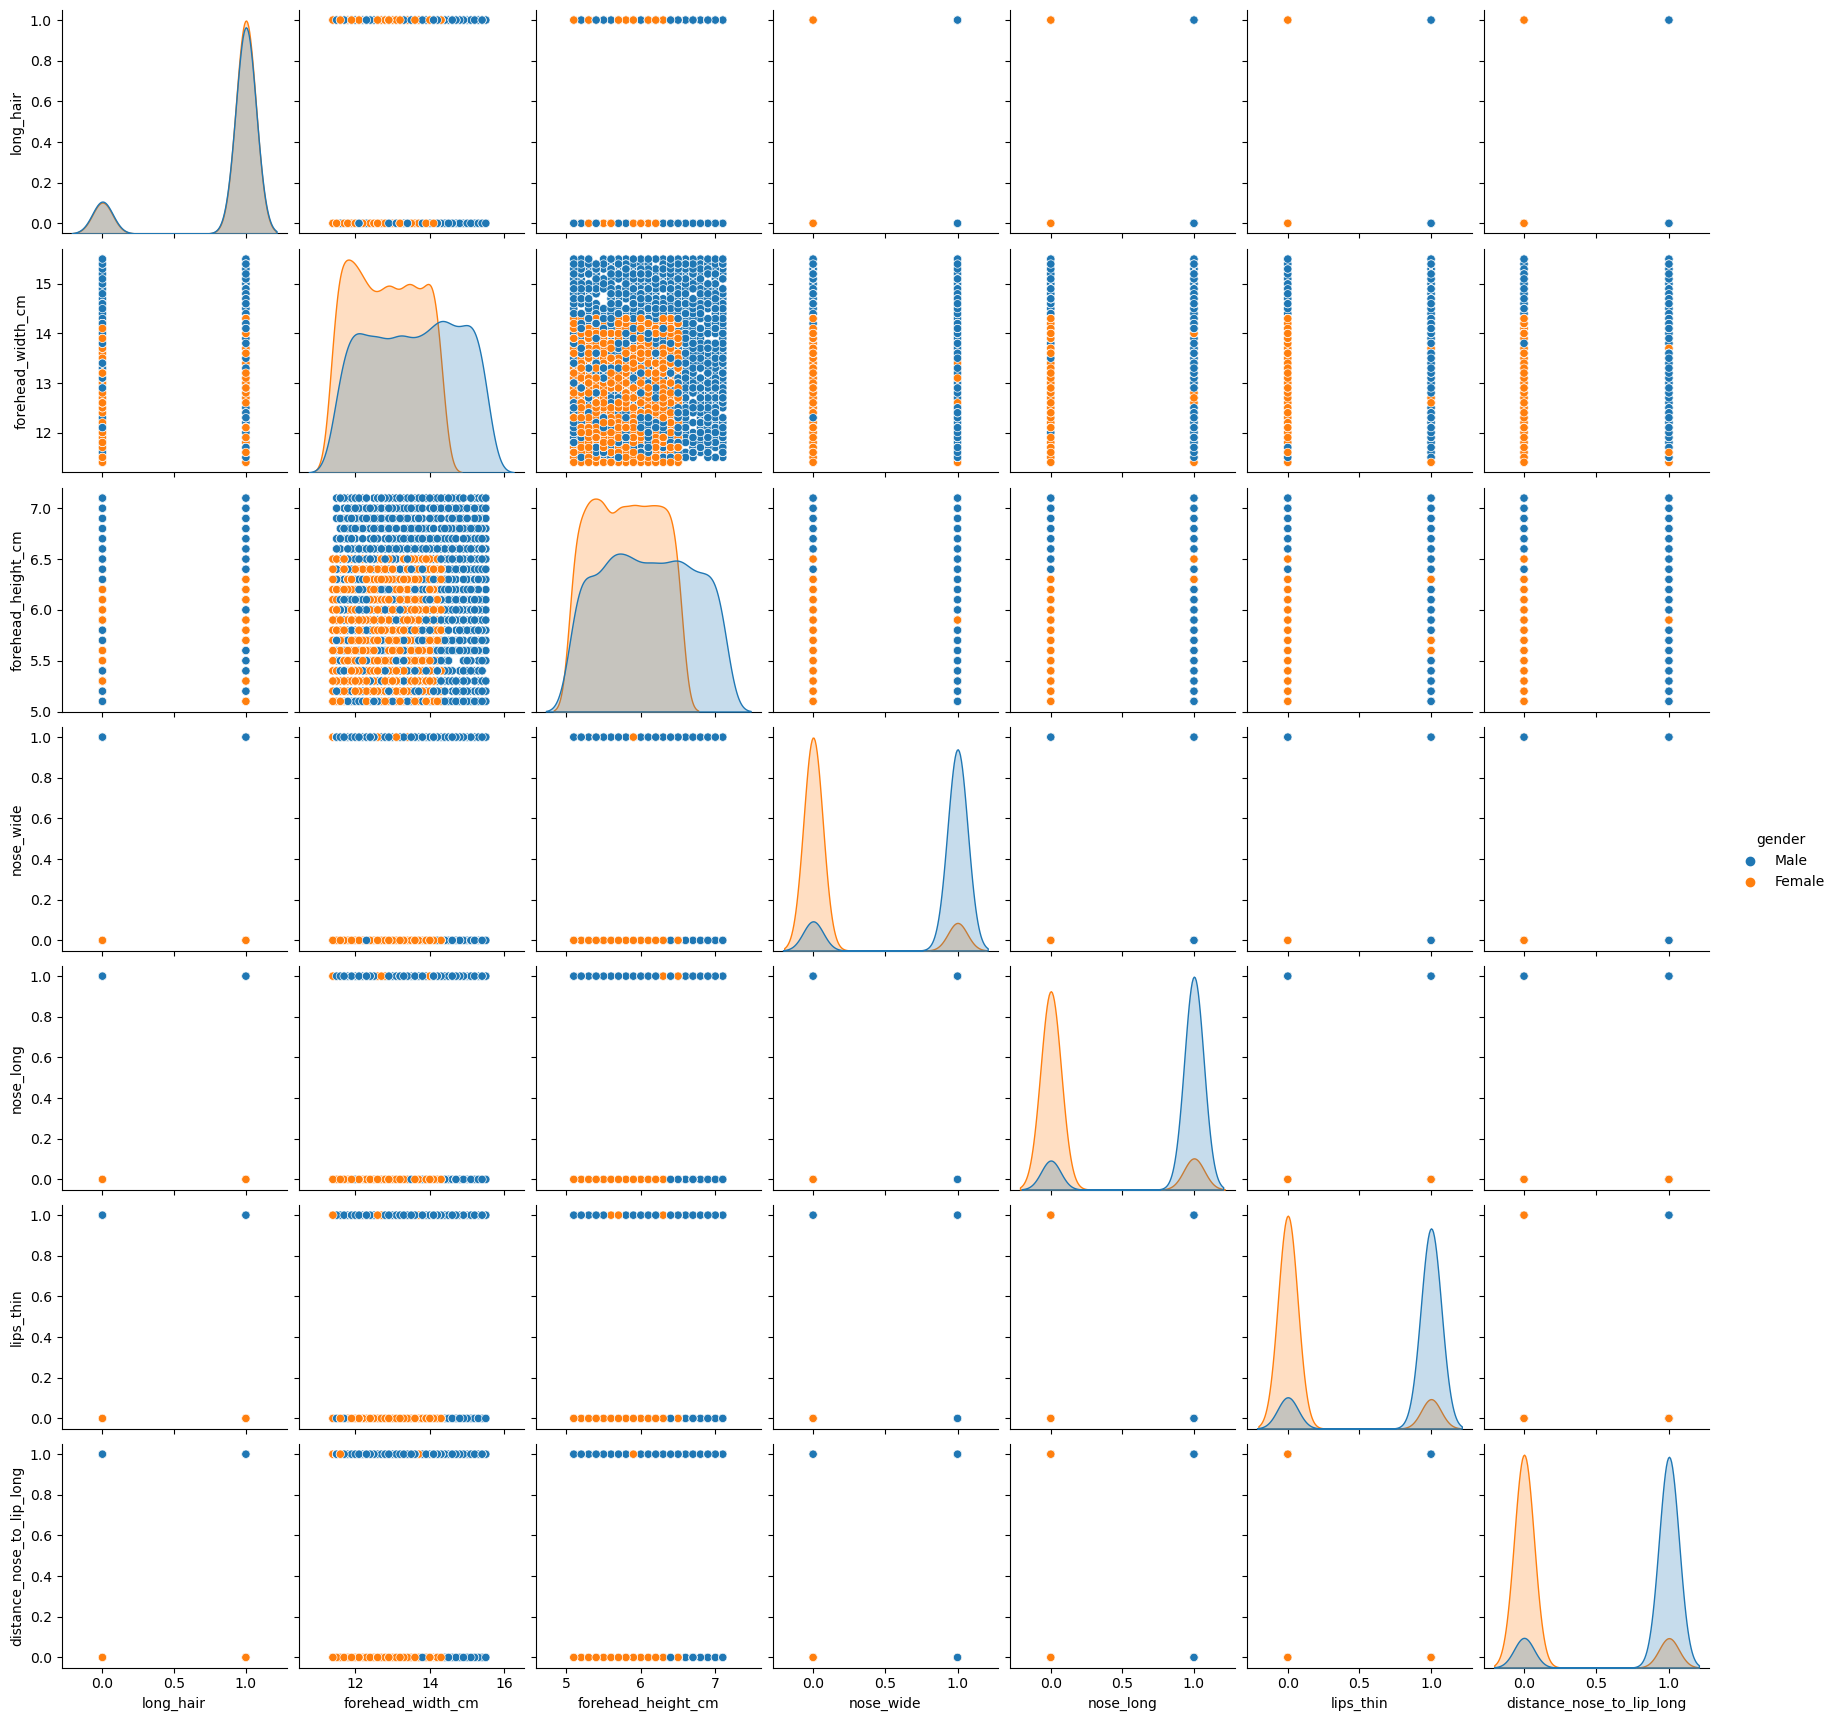

In [10]:
sns.pairplot(df, hue = "gender")

# Male & Female Distribution in Data

gender
Female    2501
Male      2500
Name: count, dtype: int64

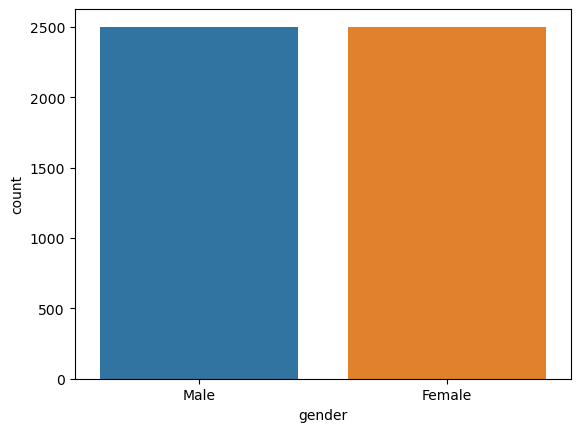

In [11]:
sns.countplot(x = "gender", data = df)
df.loc[:,"gender"].value_counts()

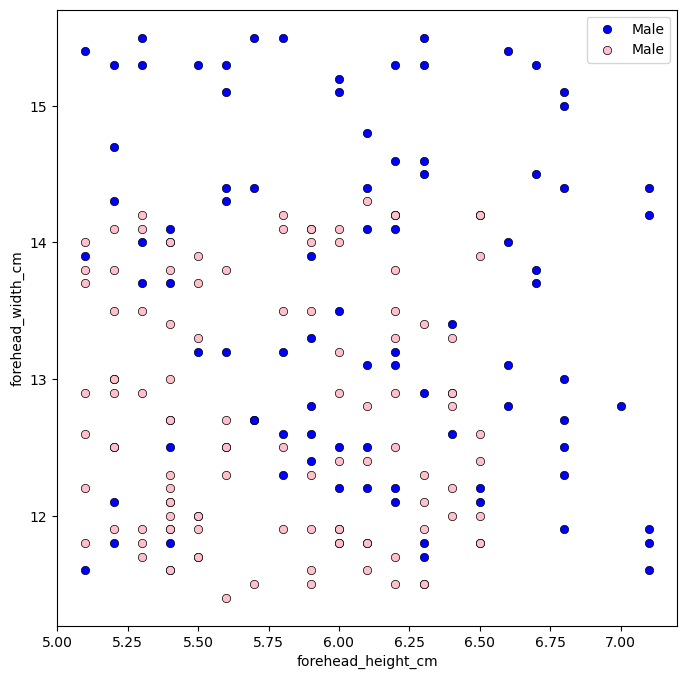

In [12]:
Male = df[df.gender == "Male"].iloc[:100,:]
Female = df[df.gender == "Female"].iloc[:100,:]

plt.figure(figsize = (8,8))
plt.scatter(Male.forehead_height_cm, Male.forehead_width_cm, color = "blue", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.scatter(Female.forehead_height_cm, Female.forehead_width_cm, color = "pink", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.xlabel("forehead_height_cm")
plt.ylabel("forehead_width_cm")
plt.legend()
plt.show()

# Naive baye's Model

needs normalization of classification predicton to classify into 0 & 1 if writing from scratch

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

In [15]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gnb = GaussianNB()
y_ = gnb.fit(x_train,y_train).predict(x_test)

In [19]:
print("Number of mislabeled points out of a total %d points : %d" %(x_test.shape[0], (y_test != y_).sum()))

Number of mislabeled points out of a total 1501 points : 52


# for more : go to
https://scikit-learn.org/stable/modules/naive_bayes.html